In [213]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [214]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\DS P1\bangalore_housing_prediction\data\bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Data Exploration (EDA)**

In [215]:
df.shape

(13320, 9)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [217]:
# Descriptive statistics of the dataset
descriptive_stats = df.describe()
descriptive_stats

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [218]:
df = df.rename(columns={"price": "Price(in INR Lakhs)"})
df["location"] = df["location"].str.lower()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,Price(in INR Lakhs)
0,Super built-up Area,19-Dec,electronic city phase ii,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,chikka tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Drop features that are not required to build our model**

In [219]:
df1 = df.drop(columns = ["area_type", "availability", "society", "balcony"])
df1.head()

,location,size,total_sqft,bath,Price(in INR Lakhs)
0,electronic city phase ii,2 BHK,1056,2.0,39.07
1,chikka tirupathi,4 Bedroom,2600,5.0,120.00
2,uttarahalli,3 BHK,1440,2.0,62.00
3,lingadheeranahalli,3 BHK,1521,3.0,95.00
4,kothanur,2 BHK,1200,2.0,51.00


### **Data Cleaning**

In [220]:
# Checking for null values
df1.isnull().sum()

location                1
size                   16
total_sqft              0
bath                   73
Price(in INR Lakhs)     0
dtype: int64

In [221]:
# We can drop these null values, since these are very less as compared to 13k rows
df2 = df1.dropna()
df2.isnull().sum()

location               0
size                   0
total_sqft             0
bath                   0
Price(in INR Lakhs)    0
dtype: int64

In [222]:
# Lets check distinct values for Size column
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [223]:
df2["bhk"] = df2["size"].apply(lambda x: x.split(' ')[0])

df2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9136\2233164069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,Price(in INR Lakhs),bhk
0,electronic city phase ii,2 BHK,1056,2.0,39.07,2
1,chikka tirupathi,4 Bedroom,2600,5.0,120.00,4
2,uttarahalli,3 BHK,1440,2.0,62.00,3
3,lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,kothanur,2 BHK,1200,2.0,51.00,2


In [224]:
df2["bhk"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [225]:
print(df2["total_sqft"].unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


## Data Cleaning and Transformation of `total_sqft` Column

In [226]:
# Lets convert the values in float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [227]:
df2[~df2["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk
30,yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th phase jp nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,kr puram,2 BHK,1015 - 1540,2.0,56.800,2
410,kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,hennur road,2 BHK,1195 - 1440,2.0,63.770,2
648,arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple.**

In [228]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [229]:
# Function to convert total_sqft entries to square feet

def convert_to_sqft(x):

    # Check for range values like "2100-2850"
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    
    for unit, factor in conversion_factors.items():
        if unit in x:
            numeric_part = float(re.findall(r'\d+\.?\d*', x)[0])
             # Convert to square feet
            return numeric_part * factor

    # If there's no unit, assume the value is already in square feet
    try:
        return float(x)
    except ValueError:
        return None

In [230]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df4 = df3[df3.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4


## Feature Engineering

### Calculating Price per Square Foot

In this step, we calculate the `price_per_sqft` for each property using the columns `Price(in INR Lakhs)` and `area_sqft`. This calculation helps standardize property prices relative to their size, making it easier to compare properties of different areas. 

This transformation allows for more meaningful comparisons between properties by normalizing their prices based on size.


In [231]:
df4["price_per_sqft"] = df4["Price(in INR Lakhs)"] * 100000 / df4["total_sqft"]
df4.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9136\2358148880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["price_per_sqft"] = df4["Price(in INR Lakhs)"] * 100000 / df4["total_sqft"]


,location,size,total_sqft,bath,Price(in INR Lakhs),bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [232]:
df4["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [233]:
df4["location"] = df4["location"].apply(lambda x : x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

C:\Users\Admin\AppData\Local\Temp\ipykernel_9136\3462264558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["location"] = df4["location"].apply(lambda x : x.strip())


location
whitefield                                  533
sarjapur  road                              392
electronic city                             304
kanakpura road                              264
thanisandra                                 235
                                           ... 
raja rajashweri nagar                         1
basaveshwarnagar                              1
banashankari 3rd stage, vivekanandanagar      1
manyata                                       1
lic colony                                    1
Name: count, Length: 1276, dtype: int64

In [234]:
location_stats.values.sum()

np.int64(13200)

In [235]:
len(location_stats[location_stats>10])

240

In [236]:
len(location_stats[location_stats<=10])

1036

In [237]:
len(location_stats)

1276

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount.**

In [238]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
nagappa reddy layout                        10
naganathapura                               10
ganga nagar                                 10
gunjur palya                                10
dodsworth layout                            10
                                            ..
raja rajashweri nagar                        1
basaveshwarnagar                             1
banashankari 3rd stage, vivekanandanagar     1
manyata                                      1
lic colony                                   1
Name: count, Length: 1036, dtype: int64

In [239]:
len(df4["location"].unique())

1276

In [240]:
df4["location"] = df4["location"].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df4["location"].unique())

C:\Users\Admin\AppData\Local\Temp\ipykernel_9136\2033815388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["location"] = df4["location"].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)


241

### **Detect and Handle Outliers in `price_per_sqft`**

**Outliers in the price_per_sqft column can skew analysis and predictions. We use the Interquartile Range (IQR) method to identify and handle outliers** 

In [241]:
df5 = df4.copy()
df5.head()

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [242]:
df5['total_sqft'] = pd.to_numeric(df5['total_sqft'], errors='coerce')
df5['bhk'] = pd.to_numeric(df5['bhk'], errors='coerce')

# Filter records where `area_sqft` per bedroom is less than 300 sqft
suspicious_records = df5[df5['total_sqft'] / df5['bhk'] < 300]

suspicious_records.head()

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,hsr layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [243]:
df5.shape

(13200, 7)

In [244]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

## Outlier Removal Using Standard Deviation and Mean

In [245]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [246]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

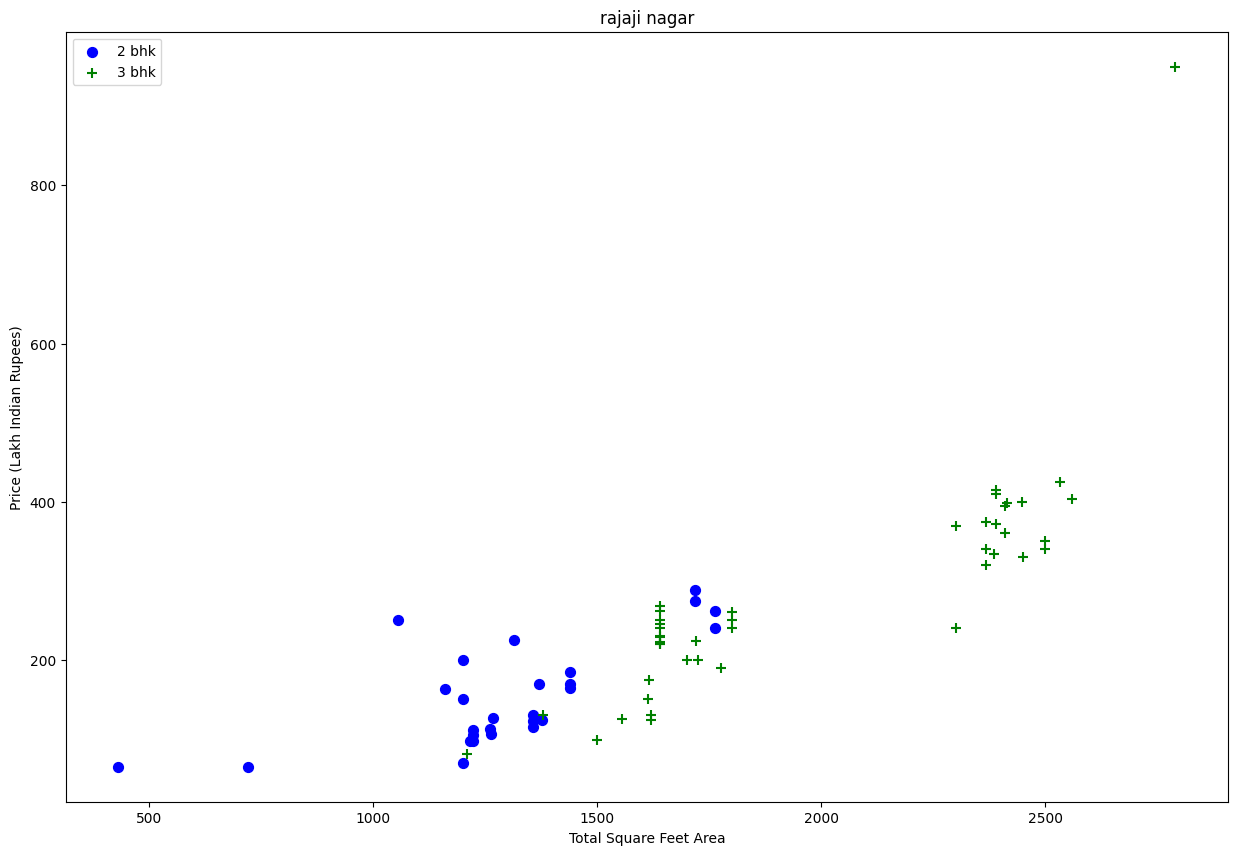

In [247]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2["Price(in INR Lakhs)"],color='blue',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3["Price(in INR Lakhs)"],marker='+', color='green',label='3 bhk', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"rajaji nagar")

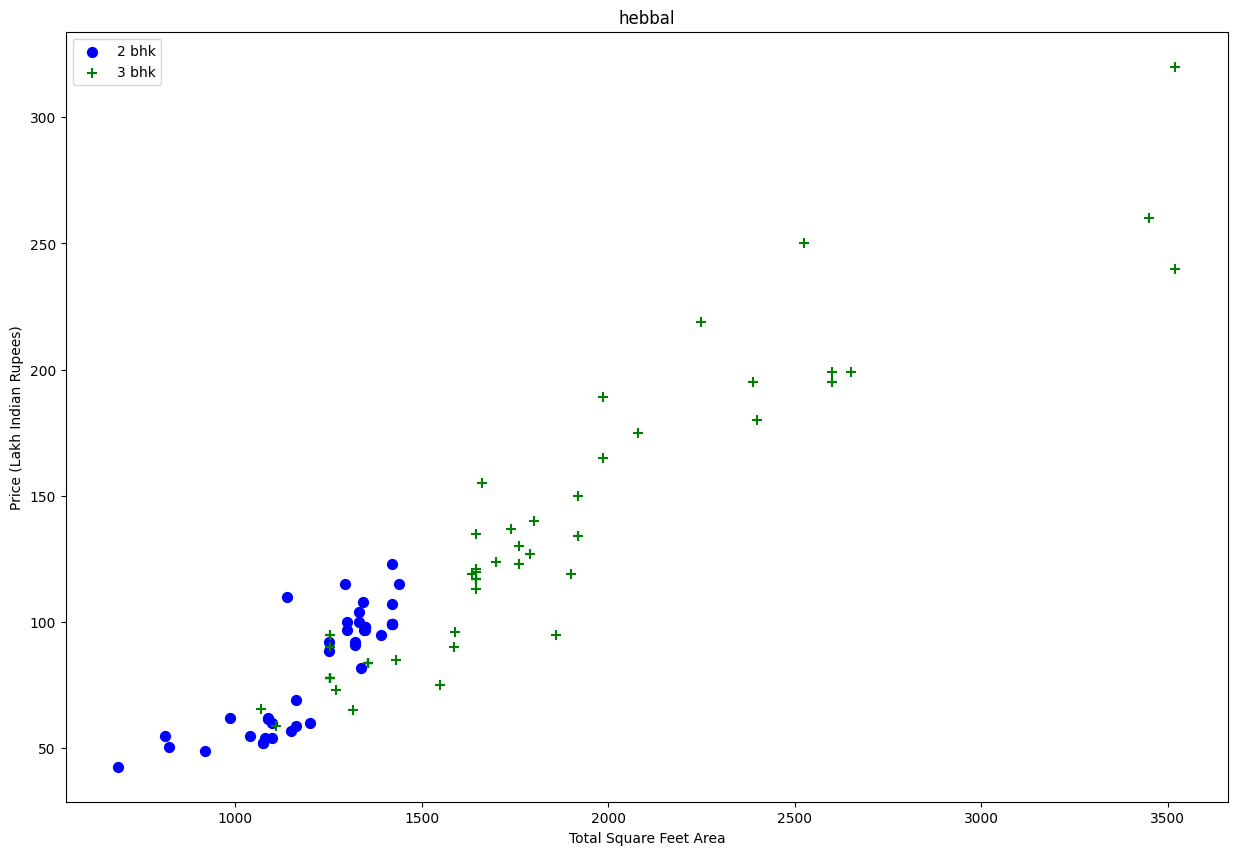

In [248]:
plot_scatter_chart(df7,"hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

In [249]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [250]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

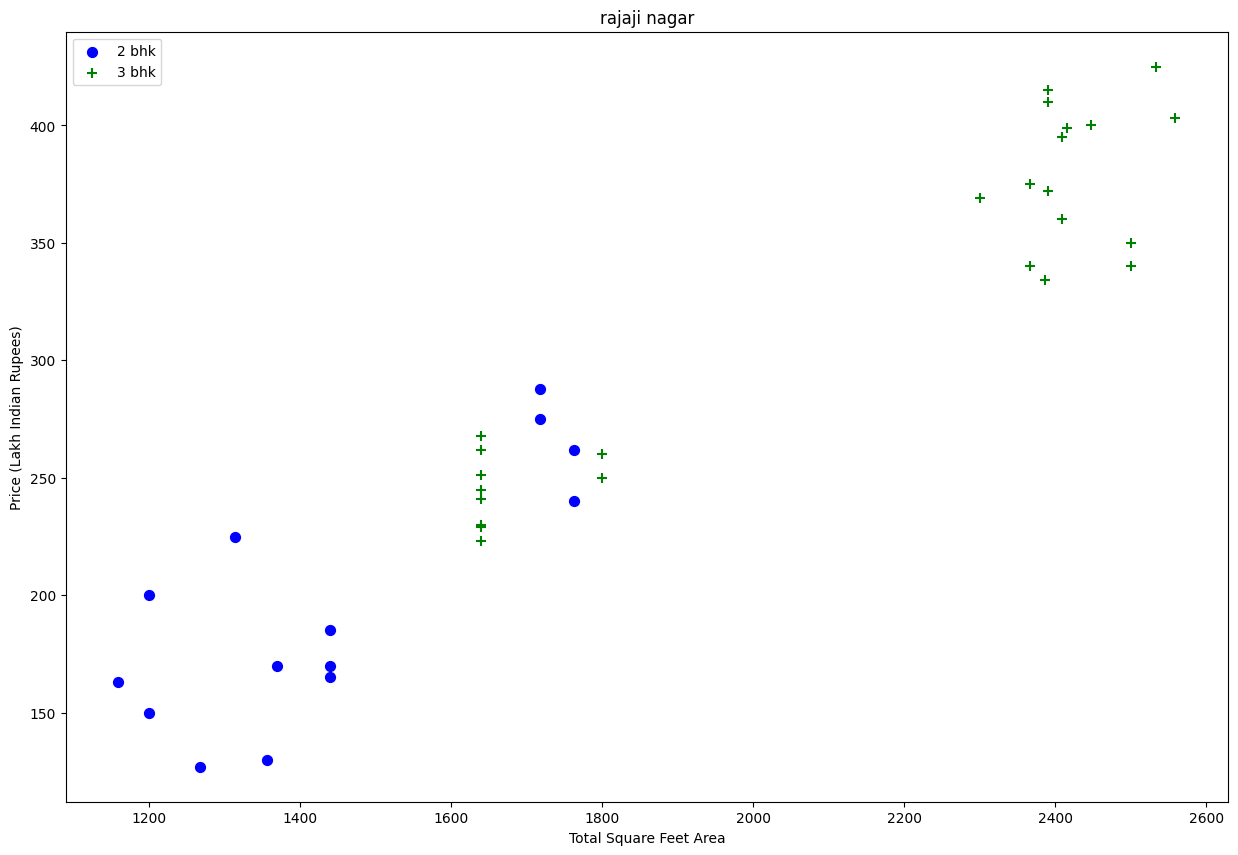

In [251]:
plot_scatter_chart(df8,"rajaji nagar")

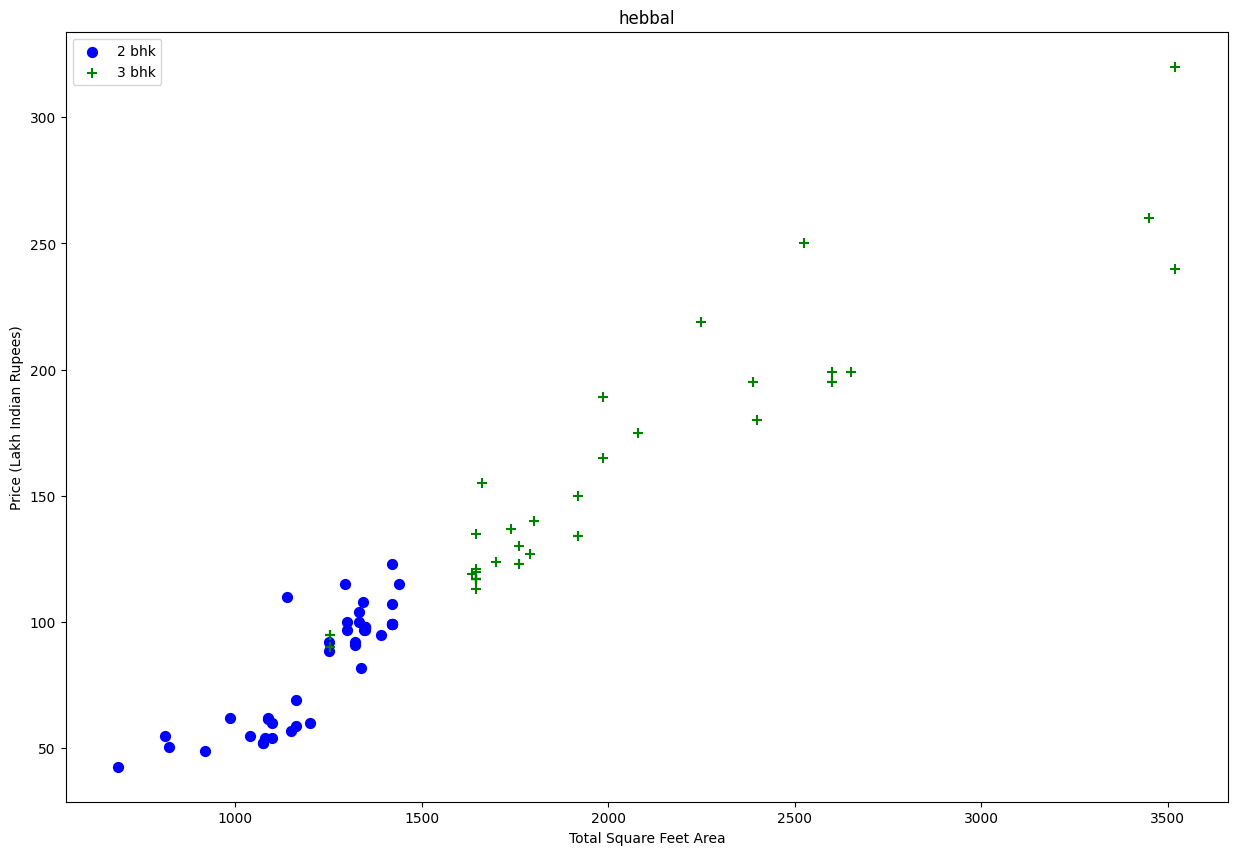

In [252]:
plot_scatter_chart(df8,"hebbal")

Text(0, 0.5, 'Count')

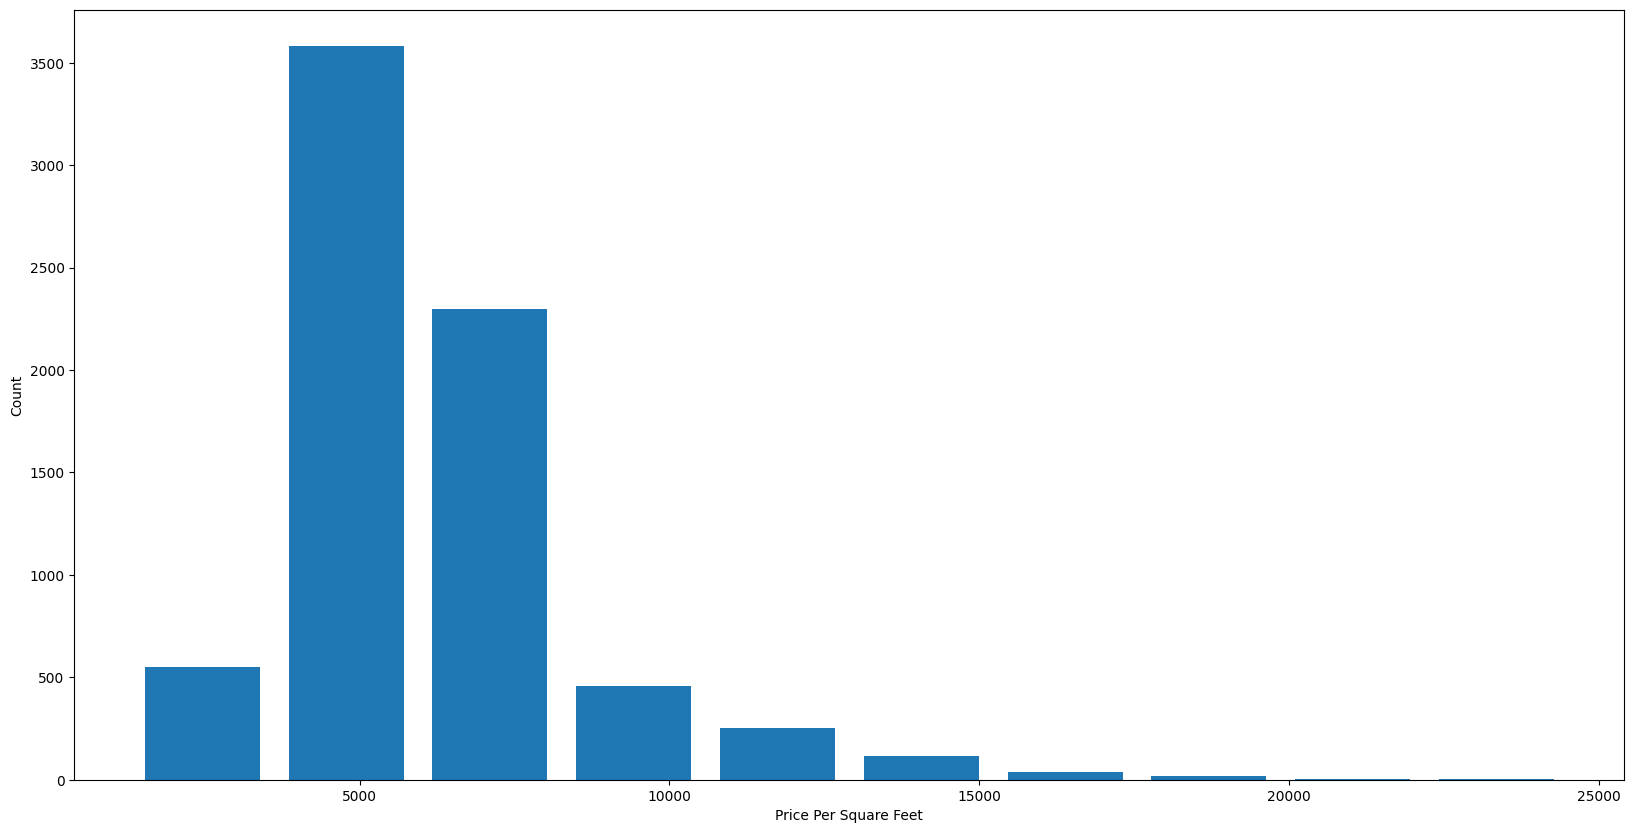

In [253]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Outlier Removal Using Bathrooms Feature**

In [254]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [255]:
df8[df8["bath"]>df8["bhk"]+2]

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk,price_per_sqft
1599,chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5222,nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5851,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9017,thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [256]:
df9 = df8[df8["bath"]<df8["bhk"]+2]
df9.head()

,location,size,total_sqft,bath,Price(in INR Lakhs),bhk,price_per_sqft
0,1st block jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st block jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st block jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st block jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st block jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [257]:
df10 = df9.drop(columns = ["size", "price_per_sqft"])
df10.head()

,location,total_sqft,bath,Price(in INR Lakhs),bhk
0,1st block jayanagar,2850.0,4.0,428.0,4
1,1st block jayanagar,1630.0,3.0,194.0,3
2,1st block jayanagar,1875.0,2.0,235.0,3
3,1st block jayanagar,1200.0,2.0,130.0,3
4,1st block jayanagar,1235.0,2.0,148.0,2


### Use One Hot Encoding For Location

In [258]:
dummies = pd.get_dummies(df10["location"])
dummies = dummies.astype(int)   # Convert True/False to 1/0

In [259]:
df10 = pd.concat([df10, dummies], axis='columns')
df10.head()

,location,total_sqft,bath,Price(in INR Lakhs),bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
df11 = df10.drop(columns = ["location", "other"])
df11.head()

,total_sqft,bath,Price(in INR Lakhs),bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Machine Learning Model**

In [261]:
# Independent variables
X = df11.drop(columns = ["Price(in INR Lakhs)"])
X.head()

,total_sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
# Dependent variables
y = df11["Price(in INR Lakhs)"]
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: Price(in INR Lakhs), dtype: float64

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [264]:
from sklearn.linear_model import LinearRegression
model_obj = LinearRegression()
model_obj.fit(X_train, y_train)
model_obj.score(X_test, y_test)

0.8715089141542658

## **Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [265]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86317866, 0.8447089 , 0.78181824, 0.84103958, 0.87235368])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose.**

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # 'mse' replaced with 'squared_error' for compatibility
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are defined in your dataset
find_best_model_using_gridsearchcv(X, y)

c:\Users\Admin\OneDrive\Desktop\DS P1\bangalore_housing_prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\OneDrive\Desktop\DS P1\bangalore_housing_prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\OneDrive\Desktop\DS P1\bangalore_housing_prediction\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\OneDrive\Desktop\DS

,model,best_score,best_params
0,linear_regression,0.840913,{'fit_intercept': False}
1,lasso,0.696313,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.693977,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

## **Test the model for few properties**

In [267]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model_obj.predict([x])[0]

In [268]:
predict_price('1st phase jp nagar',1000, 2, 2)

c:\Users\Admin\OneDrive\Desktop\DS P1\bangalore_housing_prediction\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.95409938410124)

In [269]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_obj,f)

In [270]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))